step1: download the datasets from websites and load the data using pandas library
some websites for datasets Kaggle Datasets, Google Dataset Search, UCI Machine Learning Repository, AWS Registry of Open Data, Data.gov, OpenML,

In [1]:
## a. import all libraries which is required for your project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

In [2]:
## b. Load the data using read_excel function
df = pd.read_excel('pima-data.xlsx')
df

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age  diabetes_orig    skin  has_diabetes  diabetes  
0        0.627   50              1  1.3790          True      True  
1        0.351   31              0  1.1426         False     False  
2        0.672   32              1  0.0000          True      True  
3        0.167   21              0  0.9062         False     False  
4        2.288   33              1  1.3790          True      True  
..         ...  ...            ...     ...           ...       ...  
763      0.171   63              0  1.8912         False     False  
764      0.340   27              0  1.0638         False     False  
765      0.245   30              0  0.9062         False     False  
766      0.349   47              1  0.0000          True      True  
767      0.315   23              0  1.2214         False     False  

[768 rows x 12 columns]

In [3]:
df.shape


(768, 12)

In [4]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

In [5]:
df.describe()

num_preg  glucose_conc  diastolic_bp   thickness     insulin  \
count  768.000000    768.000000    768.000000  768.000000  768.000000   
mean     3.845052    120.894531     69.105469   20.536458   79.799479   
std      3.369578     31.972618     19.355807   15.952218  115.244002   
min      0.000000      0.000000      0.000000    0.000000    0.000000   
25%      1.000000     99.000000     62.000000    0.000000    0.000000   
50%      3.000000    117.000000     72.000000   23.000000   30.500000   
75%      6.000000    140.250000     80.000000   32.000000  127.250000   
max     17.000000    199.000000    122.000000   99.000000  846.000000   

              bmi   diab_pred         age  diabetes_orig        skin  
count  768.000000  768.000000  768.000000     768.000000  768.000000  
mean    31.992578    0.471876   33.240885       0.348958    0.809136  
std      7.884160    0.331329   11.760232       0.476951    0.628517  
min      0.000000    0.078000   21.000000       0.000000    0.000000  
25%     27.300000    0.243750   24.000000       0.000000    0.000000  
50%     32.000000    0.372500   29.000000       0.000000    0.906200  
75%     36.600000    0.626250   41.000000       1.000000    1.260800  
max     67.100000    2.420000   81.000000       1.000000    3.900600

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


# step2: cleaning the datasets

In [7]:
## a. check the null values is present or not
df.isnull().sum()

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64

# note: i dont have any null values in my dataset so proceed next step
## if you have null values you can follow either dropna or fillna

# b. Remove duplicate columns
## if we want to find duplicate columns we can find corelation between two columns

In [8]:
df.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg       1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc   0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp   0.141282      0.152590      1.000000   0.207371  0.088933   
thickness     -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin       -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi            0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred     -0.033523      0.137337      0.041265   0.183928  0.185071   
age            0.544341      0.263514      0.239528  -0.113970 -0.042163   
diabetes_orig  0.221898      0.466581      0.065068   0.074752  0.130548   
skin          -0.081672      0.057328      0.207371   1.000000  0.436783   
has_diabetes   0.221898      0.466581      0.065068   0.074752  0.130548   
diabetes       0.221898      0.466581      0.065068   0.074752  0.130548   

                    bmi  diab_pred       age  diabetes_orig      skin  \
num_preg       0.017683  -0.033523  0.544341       0.221898 -0.081672   
glucose_conc   0.221071   0.137337  0.263514       0.466581  0.057328   
diastolic_bp   0.281805   0.041265  0.239528       0.065068  0.207371   
thickness      0.392573   0.183928 -0.113970       0.074752  1.000000   
insulin        0.197859   0.185071 -0.042163       0.130548  0.436783   
bmi            1.000000   0.140647  0.036242       0.292695  0.392573   
diab_pred      0.140647   1.000000  0.033561       0.173844  0.183928   
age            0.036242   0.033561  1.000000       0.238356 -0.113970   
diabetes_orig  0.292695   0.173844  0.238356       1.000000  0.074752   
skin           0.392573   0.183928 -0.113970       0.074752  1.000000   
has_diabetes   0.292695   0.173844  0.238356       1.000000  0.074752   
diabetes       0.292695   0.173844  0.238356       1.000000  0.074752   

               has_diabetes  diabetes  
num_preg           0.221898  0.221898  
glucose_conc       0.466581  0.466581  
diastolic_bp       0.065068  0.065068  
thickness          0.074752  0.074752  
insulin            0.130548  0.130548  
bmi                0.292695  0.292695  
diab_pred          0.173844  0.173844  
age                0.238356  0.238356  
diabetes_orig      1.000000  1.000000  
skin               0.074752  0.074752  
has_diabetes       1.000000  1.000000  
diabetes           1.000000  1.000000

In [9]:
def plot_corr(df,size=12):
 corr = df.corr()
 fig,ax=plt.subplots(figsize=(size,size))
 cmap='plasma'
 ax.matshow(corr,cmap=cmap)
 plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
 plt.yticks(range(len(corr.columns)),corr.columns)

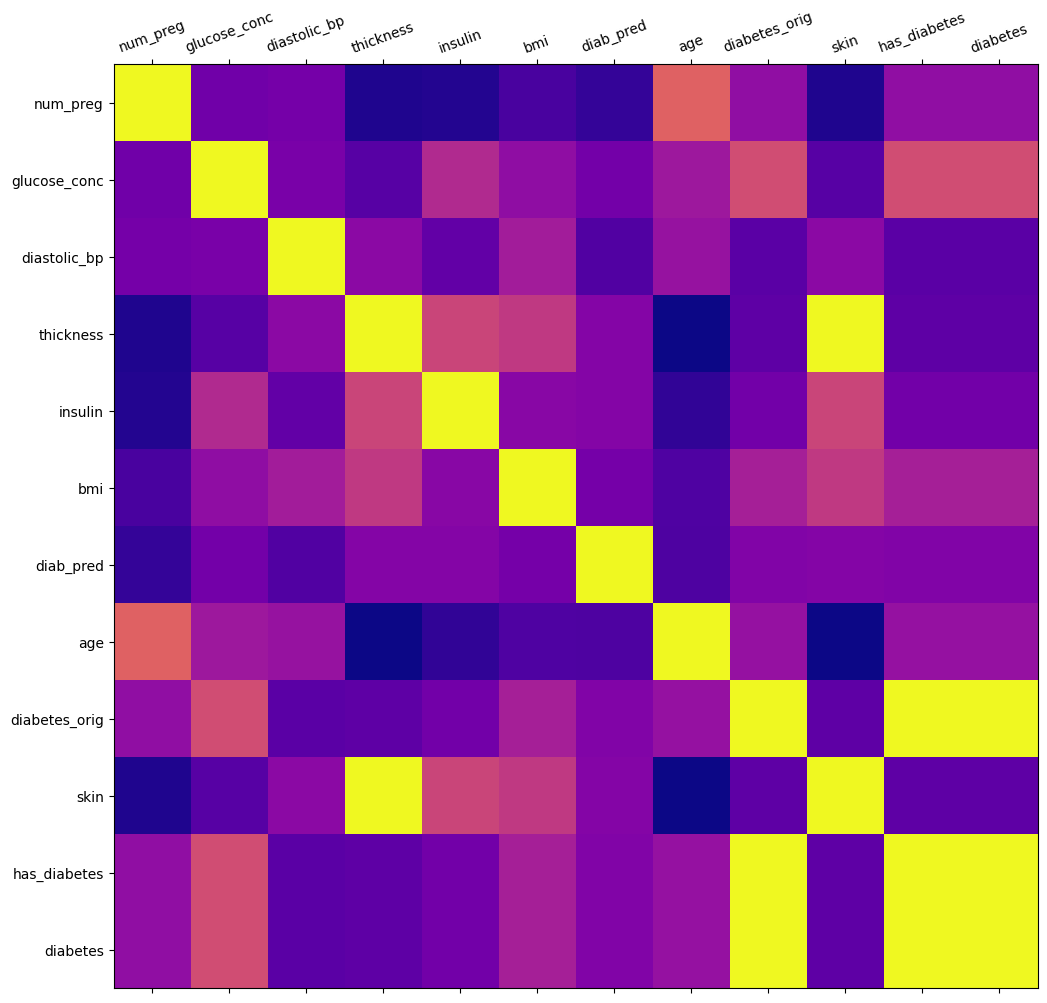

In [10]:
plot_corr(df)

# c. drop the corelated columns
## corelated columns thicknness and skin are corelated to each other. diabetes_origin and has_diabetes are corelated to each other. diabetes_origin and diabetes are corelated to each other. has_diabtes and diabetes are corelated to each other.

## Note: we cannot delete diabetes column it is a result column




In [11]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

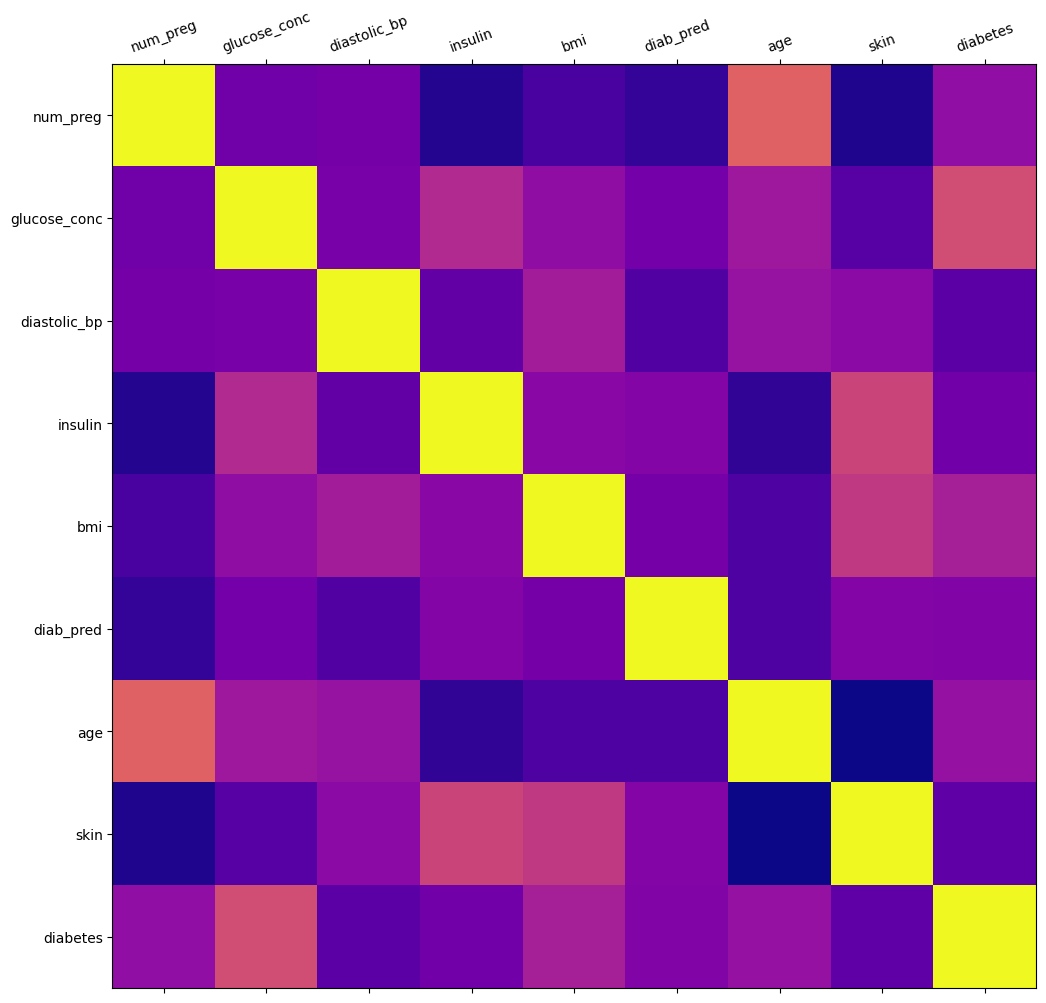

In [12]:
plot_corr(df)

In [13]:
## d. convert text to integer
 # Creating a dictionary to convert True to 1 and False to 0
 # Want to replace True and false in diabetes columns
dict1 = {
 'diabetes':[True,False]
 }
 # Inplace of True place with 1 and in place of False place with 0
dict2 = {
 'diabetes':[1,0]
 }

In [14]:
df.replace(dict1,dict2,inplace=True)

C:\Users\ES\AppData\Local\Temp\ipykernel_11860\3065561261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [15]:
df.head()

num_preg  glucose_conc  diastolic_bp  insulin   bmi  diab_pred  age  \
0         6           148            72        0  33.6      0.627   50   
1         1            85            66        0  26.6      0.351   31   
2         8           183            64        0  23.3      0.672   32   
3         1            89            66       94  28.1      0.167   21   
4         0           137            40      168  43.1      2.288   33   

     skin  diabetes  
0  1.3790         1  
1  1.1426         0  
2  0.0000         1  
3  0.9062         0  
4  1.3790         1

In [16]:
## e. check the propertion
num_true = len(df.loc[df['diabetes']==1])
num_false = len(df.loc[df['diabetes'] == 0])
print(f'num_true = {num_true}')
print(f'num_false = {num_false}')
per_num_true = (num_true / (num_true+num_false))*100
print(per_num_true)
per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)

num_true = 268
num_false = 500
34.89583333333333
65.10416666666666


# step3: Train test split

In [17]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [18]:
## a split the data
from sklearn.model_selection import train_test_split

input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred',
                 'age', 'skin']

output_columns = ['diabetes']
x = df[input_columns].values
y = df[output_columns].values
spilt_test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)


In [19]:
import random

my_list = [1, 2, 3, 4, 5]

# Set the seed using random_state = 42
random.seed(42)

# Randomly choose 2 elements
sample = random.sample(my_list, 2)

print(sample)



[1, 5]


In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [21]:
 ## b. check the training propertion and testing propertion
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in testing set


In [22]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),
                                            (len(y_train[y_train[ : ] == 1])/len(y_train))*100))
print('training False:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),
                                            (len(y_train[y_train[ : ] == 0])/len(y_train))*100))


print('training true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),
                                            (len(y_test[y_test[ : ] == 1])/len(y_test))*100))
print('training False:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),
                                             (len(y_test[y_test[ : ] == 0])/len(y_test))*100))

training true:188 (35.01%)
training False:349 (64.99%)
training true:80 (34.63%)
training False:151 (65.37%)


# step 4 post split preparation

In [23]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [24]:
total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')

total_glucose_conc = len(df.loc[df['glucose_conc']== 0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp']== 0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')
      
total_insulin = len(df.loc[df['insulin']== 0])
print(f'number of Rows missing in insulin column is {total_insulin}')
      
total_bmi = len(df.loc[df['bmi']== 0])
print(f'number of Rows missing in bmi column is {total_bmi}')
      
total_diab_pred = len(df.loc[df['diab_pred']== 0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')
      
total_age = len(df.loc[df['age']== 0])
print(f'number of Rows missing in age column is {total_age}')

total_skin = len(df.loc[df['skin']== 0])
print(f'number of Rows missing in age column is {total_skin}')
      

number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of Rows missing in age column is 0
number of Rows missing in age column is 227


In [25]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy="mean")
x_train=fill_0.fit_transform(x_train)
x_test =fill_0.fit_transform(x_test)

In [26]:
x_train[0:5]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00]])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# step5 Train the model

In [29]:
## train the model using naviebayees algorithm
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB() #creating object for GaussianNB Class
nb_model.fit(x_train,y_train.ravel()) # Training a mode

GaussianNB()

In [30]:
from sklearn import metrics

nb_predict_model = nb_model.predict(x_train)


print(f'Predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}')

Predicted accuracy 0.7541899441340782


In [31]:
nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test)}')

Predicted accuracy 0.7359307359307359


# step 6 testing the model

In [32]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,nb_predict_test)}")

confusion matrix
[[118  33]
 [ 28  52]]


In [33]:
print("classification report")
print(metrics.classification_report(y_test,nb_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# training random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # creating object for␣RandomForestClassifier class
rf_model.fit(x_train,y_train.ravel()) # Training a machine

RandomForestClassifier(random_state=42)

In [35]:
from sklearn import metrics

rf_predict_model = rf_model.predict(x_train)

print(f'Predicted accuracy {metrics.accuracy_score(y_train,rf_predict_model)}')

Predicted accuracy 1.0


In [36]:
rf_predict_test = rf_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,rf_predict_test)}')

Predicted accuracy 0.7532467532467533


In [37]:
print("confusion matrix")
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

confusion matrix
[[120  31]
 [ 26  54]]


In [38]:
 print("classification report")
 print(metrics.classification_report(y_test,rf_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## train the kn neighbours

In [39]:

from sklearn.neighbors import KNeighborsClassifier
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train,y_train.ravel())


KNeighborsClassifier()

In [40]:
kn_predict_model = k_neighbor.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,kn_predict_model)}')

Predicted accuracy 0.8379888268156425


In [41]:
x_pred = k_neighbor.predict(x_test)
print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')

Accuracy = 0.7012987012987013


In [42]:
print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

Confusion matrix = 
 [[113  38]
 [ 31  49]]


In [43]:
print("classification report")
print(metrics.classification_report(y_test,x_pred))

classification report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.61      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



# conlusion: we had trained three algorithms i.e naviebayes,random forest and knn
# we got 73,75 and 74 percentage . so i will prefer random forest algorithm for my model

In [44]:
#input_data=[1,85,66,0,26.6,0.351,31,1.1426]
input_data=[2,197,70,543,30.5,0.158,53,	1.773]

input_array = np.asarray(input_data).reshape(1,-1)
print(input_array)
 # Apply the same imputer and scaler to new data
input_array = fill_0.transform(input_array)
input_array = scaler.transform(input_array)
prediction = rf_model.predict(input_array)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")

[[2.000e+00 1.970e+02 7.000e+01 5.430e+02 3.050e+01 1.580e-01 5.300e+01
  1.773e+00]]
Prediction: Diabetic


In [45]:
import pickle
 # Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
 # Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Save imputer
with open('imputer.pkl', 'wb') as f:
    pickle.dump(fill_0, f)